### Centralised Logistic Regression - Giorgio Polla

Logistic Regression Classifier implementation.   
Centralised version, without cross-validation.

In [2]:
import math
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
def read_file(filename):
    read_data = pd.read_csv(filename, header=None)
    return read_data

In [4]:
df = read_file("../data/spam.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
def get_x(df):
    return df.iloc[:, 0:-1].values

def get_y(df):
    return df.iloc[:, -1].values

def standardize(df):
    x = get_x(df)
    df_y = df.iloc[:, -1]
    
    standard_scaler = preprocessing.StandardScaler()
    x_scaled = standard_scaler.fit_transform(x)
    
    df_x = pd.DataFrame(x_scaled)
    df_scaled = df_x.join(df_y)
    return df_scaled

In [11]:
df = standardize(df)
df[56][0]

-0.00872413388250128

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_probability(x, b, w):
    z = np.dot(x, w) + b
    return sigmoid(z)

def loss(p, y, w, lambda_reg):
    epsilon = 1e-10
    
    error_loss = -np.average(
        y * np.log(p + epsilon) + (1 - y) * np.log(1 - p + epsilon)
    )
    reg_loss = lambda_reg * np.sum(np.square(w)) / (2 * y.size)
    
    return error_loss + reg_loss

In [7]:
def train(df, iterations=20, learning_rate=1, lambda_reg=1):
    x = get_x(df)
    y = get_y(df)
    
    b = 0
    w = np.zeros(x.shape[1])
    
    loss_history = [[],[]]
    
    for it in range(iterations):
        pred = predict_probability(x, b, w)
        loss_a = loss(pred, y, w, lambda_reg)
        
        gradient_w = np.dot(x.T, (pred - y))
        gradient_b = np.average(pred - y)
        regularization = lambda_reg * w
        
        b -= learning_rate * gradient_b
        w -= learning_rate * (gradient_w + regularization) / y.size
            
        if it % (iterations / 5) == 0:
            print("It. %4d\t|\tLoss: %0.4f" %  (it, loss_a))
        
        if it % 10 == 0 or it == iterations - 1:
            temp_loss = loss_a
            loss_history[0].append(temp_loss)
            loss_history[1].append(it)
        
    return b, w, loss_history

In [8]:
def predict(x, b, w, threshold=0.5):
    prob = predict_probability(x, b, w)
    return prob >= threshold

def accuracy(df, b, w, threshold=0.5):
    x = get_x(df)
    y = get_y(df)
    pred = predict(x, b, w, threshold=threshold)
    
    accuracy = np.average(pred == y)
    print("Accuracy: %0.4f" % accuracy)
    
    return accuracy

It.    0	|	Loss: 0.6931
It.   20	|	Loss: 0.2189
It.   40	|	Loss: 0.2148
It.   60	|	Loss: 0.2132
It.   80	|	Loss: 0.2124
Accuracy: 0.9272


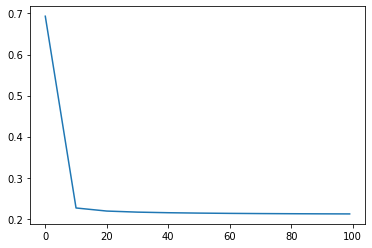

In [10]:
b, w, loss_history = train(df, 
                           iterations=100, 
                           learning_rate=10, 
                           lambda_reg=1
                          )

plt.plot(np.asarray(loss_history[1]), np.asarray(loss_history[0]))

accuracy(df, b, w, threshold=0.5);

In [33]:
from sklearn.linear_model import LogisticRegression

x = get_x(df)
y = get_y(df)

lr_model = LogisticRegression(
    verbose=1, 
    max_iter=9, 
    solver='liblinear'
)
lr_model.fit(x, y)

print('Accuracy sklearn: {:.4f}'.format(lr_model.score(x, y)))

[LibLinear]Accuracy sklearn: 0.9302
